### Class 6

##### Plot the graph and find the maxima or minima of the following functions:
#####  1. $f(x) = 3x^2+1$
#####  2. $f(x) = -3x^2+6x+1$
#####  3. $f(x) = sin(x)$
#####  4. $f(x,y) = exp(-0.5*(x^2+y^2))$
#####  5. $f(x,y) = x^2+y^2$
#####  6. $f(x,y) = 12x+18y-2x^2-xy-2y^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

#### 1. $f(x)=3x^2+1$

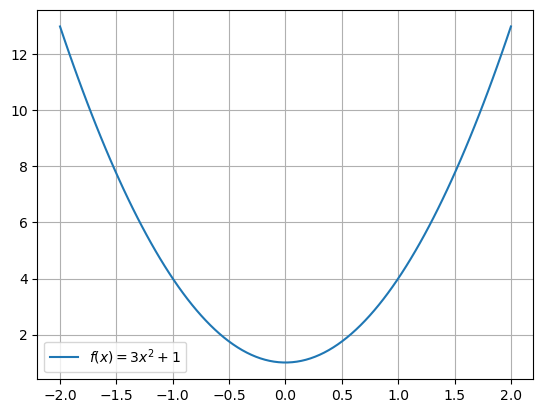

In [4]:
# plot the graph of the function

def func(x):                              
    return 3*x**2+1

X = np.linspace(-2,2,100) 
Y = func(X)

fig = plt.figure()
plt.plot(X,Y,label='$f(x)=3x^2+1$')
plt.legend(loc='lower left')
plt.grid() # to configure the grid lines
plt.show()

In [5]:
# Note that the function has a minimum for x=0.
# Let us find this minimum using the Python "minimize" function

def funcGrad(x):                   # first derivative, or gradient          
    return 6*x

def funcHess(x):                   # second derivative, or Hessian           
    return 6

x0 = np.array([-1])
res = minimize(func, x0, method="Newton-CG" , jac=funcGrad, hess = funcHess, options={'disp': True})# options to have the message
print(res)

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 2
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 2
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.0
       x: [ 0.000e+00]
     nit: 2
     jac: [ 0.000e+00]
    nfev: 2
    njev: 2
    nhev: 2


#### 2. $f(x)=-3x^2+6x+1$

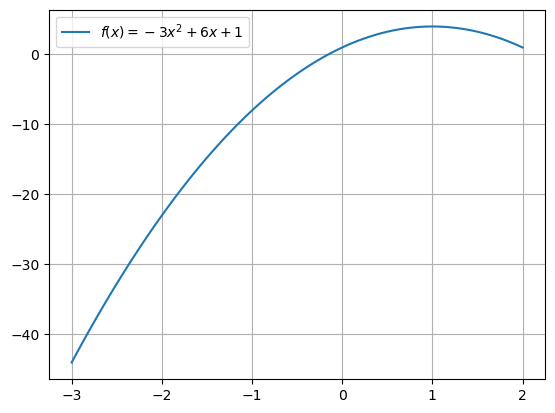

In [6]:
# plot the graph of the function

def func(x):                              
    return -3*x**2+6*x+1

fig = plt.figure()
X = np.linspace(-3,2,100) 
Y = func(X)

plt.plot(X,Y,label='$f(x)=-3x^2+6x+1$')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [8]:
# Note that the function has a maximum for x=1.  We minimize -f(x)!
def func(x):                              
    return -3*x**2+6*x+1
    
def funcGrad(x):                          # first derivative, or gradient
    return -(-6*x+6)

def funcHess(x):                          # second derivative, or Hessian       
    return 6

x0 = np.array([1])
res = minimize(func, x0, method='Newton-CG', jac=funcGrad, hess = funcHess, options={'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 4.000000
         Iterations: 1
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1
[1.]


####  3. $f(x)=sin(x)$

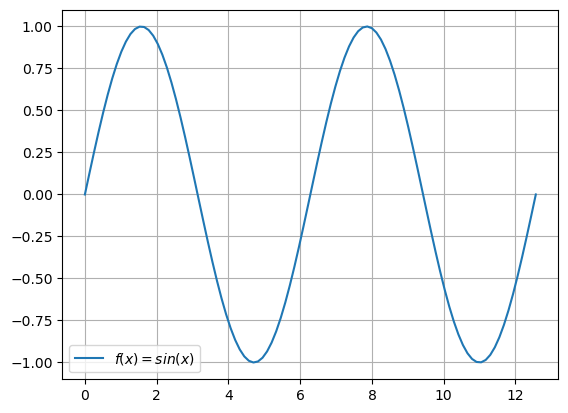

In [9]:
# plot the graph of the function

def func(x):                              
    return np.sin(x)

fig = plt.figure()
X = np.linspace(0,4*np.pi,100) # np.pi is π
Y = func(X)

plt.plot(X,Y,label='$f(x)=sin(x)$')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [11]:
# Note that the function has several local minima (and maxima)
# Given a starting point x0, the algorithm converges to the local minimum closest to x0

def funcGrad(x):                              
    return np.cos(x)                     # first derivative, or gradient 

def funcHess(x):                         # second derivative, or Hessian
    return -np.sin(x)

x0 = np.array([2.5])
res = minimize(func, x0, method='Newton-CG', jac=funcGrad, hess = funcHess, options={'disp': True})
print(res.x)

# To find maxima, we can use the same method seen above, i.e. we minimize -sin(x)

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
         Hessian evaluations: 4
[4.71238898]


####  4. $f(x,y) = exp(-0.5*(x^2+y^2))$

<Figure size 640x480 with 0 Axes>

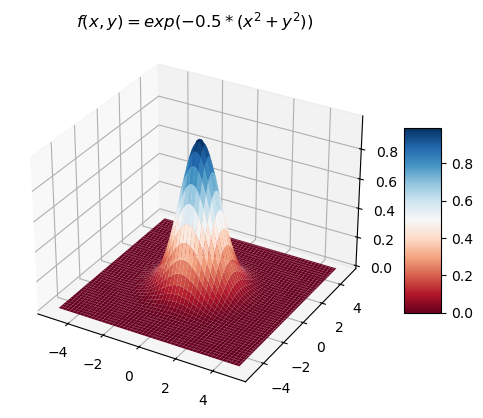

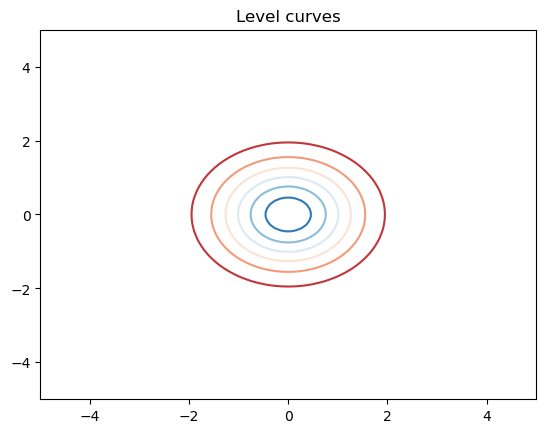

In [13]:
# Plot the graph of the function and its level curves

def funcGraph(x,y):                 
    return np.exp(-0.5*(x**2+y**2))


xMin = -5; xMax = 5; yMin = -5; yMax = 5     # Extrema of the grid
nPoints = 100                                # N. of points in the grid

x = np.linspace(xMin,xMax,nPoints)           # Range of x
y = np.linspace(yMin,yMax,nPoints)           # Range of y
X,Y = np.meshgrid(x, y)                      # Coordinates of x and y of the points in the grid 
Z = funcGraph(X, Y)                          # Values of the function in the points of the grid

# Graph
fig = plt.figure()
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

surf = ax.plot_surface(X, Y, Z,cmap=cm.RdBu)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('$f(x,y) = exp(-0.5*(x^2+y^2))$')
plt.show()

# Level curves

plt.contour(x,y,Z,cmap=cm.RdBu)
plt.title('Level curves')
plt.show()

In [14]:
# Note that the function has one maximum in (0,0)
# Given a starting point x0, the algorithm converges to that point

def func(var):
    x = var[0]
    y = var[1]
    return -(np.exp(-0.5 * (x**2 + y**2)))

def funcGrad(var):
    x = var[0]
    y = var[1]
    grad = np.zeros(2)
    grad[0] = x * np.exp(-0.5 * (x**2 + y**2))  
    grad[1] = y * np.exp(-0.5 * (x**2 + y**2))
    return grad  

def funcHess(var):
    x = var[0]
    y = var[1]
    exp_term = np.exp(-0.5 * (x**2 + y**2))
    hess = np.zeros((2, 2))
    hess[0, 0] = (1 - x**2) * exp_term  
    hess[1, 1] = (1 - y**2) * exp_term
    hess[0, 1] = hess[1, 0] = -x * y * exp_term
    return hess 

x0 = np.array([2, 5])
res = minimize(func, x0, method='Newton-CG', jac=funcGrad, hess=funcHess, options={'disp': True})
print(res.x)
print(-res.fun)


Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 2
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 2
[2.16258099e-20 5.41042295e-20]
1.0


####  5. $f(x,y) = x^2+y^2$

<Figure size 640x480 with 0 Axes>

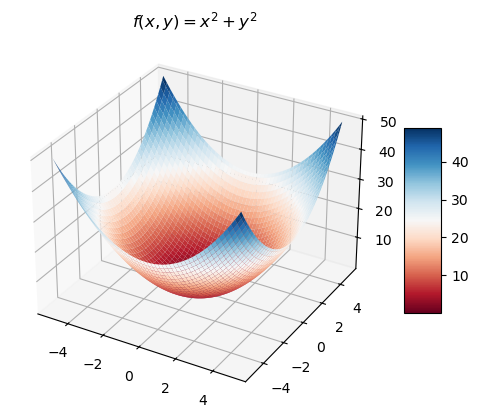

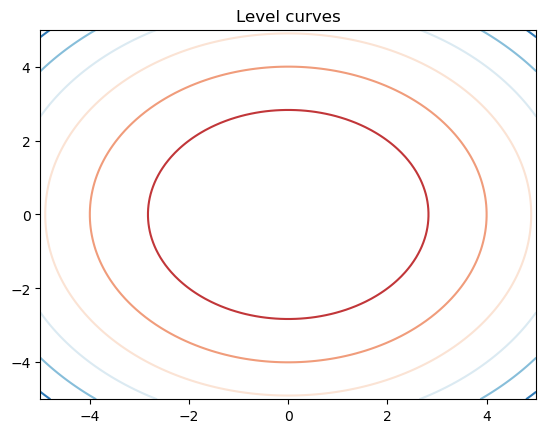

In [15]:
# Plot the graph of the function and its level curves

def funcGraph(x,y):                 
    return x**2+y**2


xMin = -5; xMax = 5; yMin = -5; yMax = 5     # Extrema of the grid
nPoints = 100                                # N. of points in the grid

x = np.linspace(xMin,xMax,nPoints)           # Range of x
y = np.linspace(yMin,yMax,nPoints)           # Range of y
X,Y = np.meshgrid(x, y)                      # Coordinates of x and y in the grid 
Z = funcGraph(X, Y)                          # Values of the function in the points of the grid

# Graph
fig = plt.figure()
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

surf = ax.plot_surface(X, Y, Z,cmap=cm.RdBu)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('$f(x,y)=x^2+y^2$')
plt.show()

# Level curves

plt.contour(x,y,Z,cmap=cm.RdBu)
plt.title('Level curves')
plt.show()

In [99]:
# Note that the function has a minimum for x=0,y=0

def func(var):                # We use this for optimizing, but it is the same function as funcGraph  
    x = var[0] 
    y = var[1]
    return x**2+y**2
    
def funcGrad(var):            # first derivative, or gradient
    x = var[0] 
    y = var[1]
    grad = np.zeros(2)
    grad[0] = 2*x
    grad[1] = 2*y
    return grad

def funcHess(var):            # second derivative, or Hessian
    x = var[0] 
    y = var[1]
    hess = np.zeros((2,2))
    hess[0,0] = 2
    hess[0,1] = 0
    hess[1,0] = 0
    hess[1,1] = 2
    return hess

x0 = np.array([2,5])
res = minimize(func, x0, method='Newton-CG', jac=funcGrad, hess = funcHess, options={'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 2
[0. 0.]


####  6. $f(x,y) = 12x+18y-2x^2-xy-2y^2$

<Figure size 640x480 with 0 Axes>

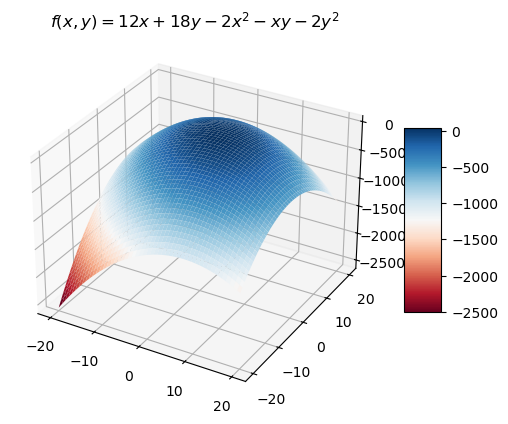

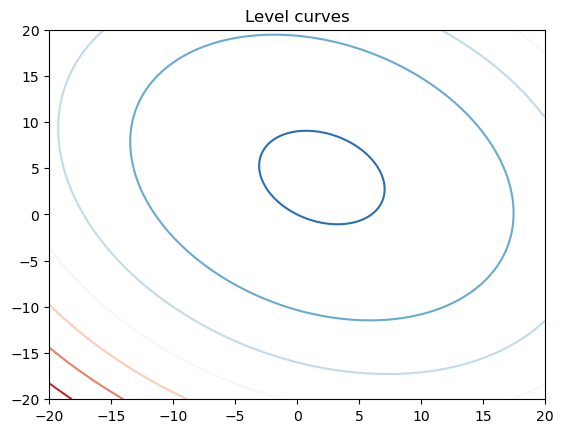

In [16]:
#  Plot the graph of the function and its level curves
def funcGraph(x,y):                 
    return 12*x+18*y-2*x**2-x*y-2*y**2


xMin = -20; xMax = 20; yMin = -20; yMax = 20      # Extrema of the grid
nPoints = 200                                # N. of points in the grid

x = np.linspace(xMin,xMax,nPoints)           # Range of x
y = np.linspace(yMin,yMax,nPoints)           # Range of y
X,Y = np.meshgrid(x, y)                      # Coordinates of x and y in the grid 
Z = funcGraph(X, Y)                          # Values of the function in the points of the grid

# Graph
fig = plt.figure()
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.RdBu)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('$f(x,y)=12x+18y-2x^2-xy-2y^2$')
plt.show()

# Level curves
plt.contour(x,y,Z,cmap=cm.RdBu)
plt.title('Level curves')
plt.show()

In [17]:
import autograd.numpy as np
from autograd import grad, hessian
from scipy.optimize import minimize

# Definisci la funzione da ottimizzare
def func(var):
    x = var[0] 
    y = var[1]
    return -(12*x + 18*y - 2*x**2 - x*y - 2*y**2)

# Calcola automaticamente il gradiente e la hessiana
funcGrad = grad(func)
funcHess = hessian(func)

# Punto iniziale
x0 = np.array([1,1])

# Ottimizzazione usando Newton-CG
res = minimize(func, x0, method='Newton-CG', jac=funcGrad, hess=funcHess, options={'disp': True})

print(res.x)


ModuleNotFoundError: No module named 'autograd'

In [18]:
import numpy as np
from scipy.optimize import minimize
import sympy as sp

# Definizione delle variabili simboliche
x_sym, y_sym = sp.symbols('x y')

# Definizione della funzione simbolica
f_sym = -(12*x_sym + 18*y_sym - 2*x_sym**2 - x_sym*y_sym - 2*y_sym**2)

# Calcolo delle derivate simboliche (gradiente e hessiana)
grad_f_sym = [sp.diff(f_sym, var) for var in (x_sym, y_sym)]
hess_f_sym = [[sp.diff(grad, var) for var in (x_sym, y_sym)] for grad in grad_f_sym]

# Funzione per convertire le espressioni simboliche in funzioni numeriche
f_lambdified = sp.lambdify((x_sym, y_sym), f_sym, "numpy")
grad_f_lambdified = sp.lambdify((x_sym, y_sym), grad_f_sym, "numpy")
hess_f_lambdified = sp.lambdify((x_sym, y_sym), hess_f_sym, "numpy")

# Funzione da ottimizzare
def func(var):
    x, y = var
    return f_lambdified(x, y)

# Gradiente della funzione
def funcGrad(var):
    x, y = var
    return np.array(grad_f_lambdified(x, y))

# Hessiana della funzione
def funcHess(var):
    x, y = var
    return np.array(hess_f_lambdified(x, y))

# Punto iniziale
x0 = np.array([1, 1])

# Ottimizzazione usando Newton-CG
res = minimize(func, x0, method='Newton-CG', jac=funcGrad, hess=funcHess, options={'disp': True})

print(res.x)


Optimization terminated successfully.
         Current function value: -48.000000
         Iterations: 6
         Function evaluations: 6
         Gradient evaluations: 6
         Hessian evaluations: 6
[2. 4.]
